In [1]:
import torch
import torch.nn as nn
from matplotlib import pyplot as plt 
import os
import glob
from sklearn.model_selection import train_test_split
import spacy
import numpy as np
#import torchtext
#from torchtext.legacy import data
from tqdm import tqdm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
from transformers import AutoTokenizer
checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [3]:
raw_inputs = [
    "I've been waiting for a HuggingFace course my whole life.",
    "I hate this so much!",
]
inputs = tokenizer(raw_inputs, padding=True, truncation=True, return_tensors="pt")
print(inputs)

{'input_ids': tensor([[  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,
          2607,  2026,  2878,  2166,  1012,   102],
        [  101,  1045,  5223,  2023,  2061,  2172,   999,   102,     0,     0,
             0,     0,     0,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]])}


In [4]:
from transformers import AutoModel
checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModel.from_pretrained(checkpoint)
outputs = model(**inputs)
print(outputs.last_hidden_state.shape)

Some weights of the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english were not used when initializing DistilBertModel: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.bias', 'classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


torch.Size([2, 16, 768])


In [5]:
test_inputs = ["been","waiting","for","a","HuggingFace","course"]
inputs = tokenizer(test_inputs, padding=True, truncation=True, return_tensors="pt")
outputs = model(**inputs)
print(outputs.last_hidden_state[0])

tensor([[ 0.2383,  0.2000, -0.0651,  ..., -0.4208,  0.1367,  0.0597],
        [ 0.5378,  0.1380,  0.0164,  ..., -0.5063, -0.1047,  0.2858],
        [ 0.8940,  0.2393,  0.4663,  ...,  0.5721,  0.0440, -0.6353],
        [ 0.4255, -0.3910, -0.0587,  ..., -0.1365, -0.1222,  0.0253]],
       grad_fn=<SelectBackward0>)


In [6]:
from transformers import BertConfig, BertModel

# Initializing a BERT bert-base-uncased style configuration
configuration = BertConfig()

# Initializing a model (with random weights) from the bert-base-uncased style configuration
bert_model = BertModel(configuration)

# Accessing the model configuration
configuration = bert_model.config

#help(bert_model)
outputs = bert_model(**inputs)
print(outputs.pooler_output.shape)
tokens = tokenizer(["apple"], padding=True, truncation=True, return_tensors="pt")
print(bert_model(**tokens).pooler_output.detach().numpy())

torch.Size([6, 768])
[[ 6.76327109e-01  8.95159483e-01 -1.78407028e-01  4.63507265e-01
   2.60201573e-01 -5.37150204e-01 -4.17242825e-01  9.78535563e-02
  -5.31623662e-01 -1.36605218e-01  5.88775277e-01  5.45005202e-01
   7.17310309e-02  5.54966331e-01 -2.26320118e-01 -3.69144142e-01
  -3.34381104e-01 -3.37051712e-02  7.89018452e-01  2.84465402e-01
   4.26457435e-01 -3.56830955e-01 -5.03914319e-02 -6.18175939e-02
   2.31763601e-01 -2.58212924e-01  1.56839639e-01  6.45594522e-02
  -2.32422531e-01  7.57843316e-01  5.79261243e-01 -3.68785024e-01
   3.39310795e-01 -5.29001415e-01 -3.44555557e-01 -1.65921763e-01
   1.67615712e-01  3.93416196e-01  1.44806042e-01  4.23444480e-01
  -2.90403664e-01 -7.71456480e-01  1.78392395e-01 -2.90048897e-01
  -1.24328189e-01  5.47402203e-01 -3.50431614e-02 -3.12627524e-01
  -5.71005762e-01  3.09934497e-01  1.22876145e-01  7.50195086e-01
  -6.49722219e-01  6.88737631e-01  2.64797717e-01  4.32540745e-01
  -3.97290587e-02  6.62263274e-01  1.64341599e-01 -3.02

In [7]:
import gensim
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

# 格式转换
glove_input_file = 'glove.6B.50d.txt'
word2vec_output_file = 'glove.6B.50d.word2vec.txt'
(count, dimensions) = glove2word2vec(glove_input_file, word2vec_output_file)

# 加载词向量
glove_model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

C:\Users\14663\AppData\Local\Temp\ipykernel_5768\610384723.py:8: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  (count, dimensions) = glove2word2vec(glove_input_file, word2vec_output_file)


In [8]:
result = glove_model.most_similar(positive=['woman', 'king'], negative=['man']) 
print(result)

[('queen', 0.8523604273796082), ('throne', 0.7664334177970886), ('prince', 0.7592144012451172), ('daughter', 0.7473882436752319), ('elizabeth', 0.7460220456123352), ('princess', 0.7424570322036743), ('kingdom', 0.7337412238121033), ('monarch', 0.721449077129364), ('eldest', 0.7184861898422241), ('widow', 0.7099431157112122)]


In [9]:
# TODO
result = glove_model.most_similar(positive=['money', 'goods'], negative=['price']) 
print(result)

[('illegally', 0.7457526326179504), ('collecting', 0.7453209161758423), ('millions', 0.7384328842163086), ('distributing', 0.7279368042945862), ('distribute', 0.7207164764404297), ('abroad', 0.7137728929519653), ('collect', 0.7080919742584229), ('donations', 0.7075179815292358), ('stealing', 0.7031954526901245), ('businesses', 0.7012300491333008)]


In [10]:
#glove_model["man"] = np.zeros(50)
print(glove_model["man"])
print(len(glove_model))

[-0.094386  0.43007  -0.17224  -0.45529   1.6447    0.40335  -0.37263
  0.25071  -0.10588   0.10778  -0.10848   0.15181  -0.65396   0.55054
  0.59591  -0.46278   0.11847   0.64448  -0.70948   0.23947  -0.82905
  1.272     0.033021  0.2935    0.3911   -2.8094   -0.70745   0.4106
  0.3894   -0.2913    2.6124   -0.34576  -0.16832   0.25154   0.31216
  0.31639   0.12539  -0.012646  0.22297  -0.56585  -0.086264  0.62549
 -0.0576    0.29375   0.66005  -0.53115  -0.48233  -0.97925   0.53135
 -0.11725 ]
400000


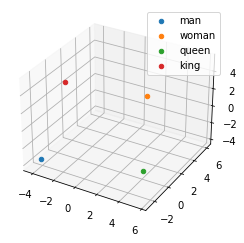

<Figure size 720x720 with 0 Axes>

In [11]:
from sklearn.decomposition import PCA
#words = ["cat", "dog", "fish", "kitten", "man", "woman","king", "queen", "doctor", "nurse"]
#words = ["optional","adopt","optic","optics","acclaim","declaim","exclaim","proclaim"]
words = ["man","woman","queen","king"]
pca = PCA(n_components=3)
tokens = tokenizer(words, padding=True, truncation=True, return_tensors="pt")
word_np = bert_model(**tokens).pooler_output.detach().numpy()
pca.fit(word_np)
word_pca = pca.transform(word_np)

ax = plt.subplot(projection = '3d')
plt.figure(figsize=(10,10))
for i in range(len(words)):
    
    ax.scatter(word_pca[i][0],word_pca[i][1],word_pca[i][2],label = words[i])

ax.legend()

plt.show()
# TODO

In [12]:
syn_path = "数据/近义词.txt"
hyper_path = "数据/超词.txt"
anto_path = "数据/反义词.txt"
contry_path = "数据/国家和首都精简.txt"
old_english_path = "数据/古今英语.txt"
topic_path = "数据/不同话题.txt"
chara_path = "数据/不同词性.txt"

In [13]:
syn_list = []
with open(syn_path,"r",encoding = "utf-8")as f:
    while True:
        line = f.readline()
        if line:
            line = line.split("\n")[0]
            ss = line.split("\t")
            s = []
            flag = True
            for word in ss:
                word = word.split(" ")[0]
                #print(word)
                if word == "Word" or word == "Synonyms":
                    flag = False
                s.append(word.lower())
            if flag and len(s)>1:
                syn_list.append(s)
        else:
            break
print(syn_list)

[['amazing', 'incredible', 'unbelievable', 'improbable', 'astonishing'], ['anger', 'enrage', 'infuriate', 'arouse', 'nettle'], ['angry', 'wrathful', 'furious', 'enraged', 'indignant'], ['answer', 'reply', 'respond', 'retort', 'acknowledge'], ['ask', 'question', 'inquire', 'query', 'interrogate'], ['awful', 'dreadful', 'terrible', 'abominable', 'unpleasant'], ['bad', 'depraved', 'rotten', 'contaminated', 'sinful'], ['beautiful', 'gorgeous', 'dazzling', 'splendid', 'magnificent'], ['begin', 'start', 'open', 'launch', 'initiate'], ['big', 'enormous', 'huge', 'immense', 'gigantic'], ['brave', 'courageous', 'fearless', 'dauntless', 'intrepid'], ['break', 'fracture', 'wreck', 'crash', 'demolish'], ['bright', 'sparkling', 'shimmering', 'radiant', 'vivid'], ['calm', 'quiet', 'peaceful', 'unruffled', 'tranquil'], ['come', 'approach', 'advance', 'near', 'arrive'], ['cool', 'chilly', 'cold', 'frosty', 'frigid'], ['crooked', 'bent', 'twisted', 'zigzag', 'hooked'], ['cry', 'weep', 'wail', 'sob', 'b

In [14]:
anto_list = []
with open(anto_path,"r",encoding = "utf-8")as f:
    while True:
        line = f.readline()
        if line:
            line = line.split("\n")[0]
            ss = line.split("\t")
            s = []
            flag = True
            for word in ss:
                word = word.split(" ")[0]
                #print(word)
                if word == "Word" or word == "Antonym":
                    flag = False
                s.append(word.lower())
            if flag and len(s)>1:
                anto_list.append(s)
        else:
            break
print(anto_list)

[['absence', 'presence', 'plenty', 'existence', 'enough'], ['accept', 'refuse', 'fail', 'deny', 'reject'], ['accurate', 'inaccurate', 'indefinite', 'unreliable', 'faulty'], ['advantage', 'disadvantage', 'harm', 'impotence', 'inferiority'], ['alive', 'dead', 'unconscious', 'sluggish', 'deceased'], ['ancient', 'modern', 'current', 'fresh', 'new'], ['answer', 'question', '', 'quiet', 'trouble'], ['approval', 'disapproval', 'denial', 'veto', 'refusal'], ['approached', 'receded', '', 'leave', 'retreat'], ['abundant', 'scarce', 'lacking', 'sparse', 'meager'], ['admit', 'deny', 'repudiate', 'expel', 'oust'], ['advance', 'retreat', '', 'behind', 'later'], ['artificial', 'natural', 'genuine', 'real', 'unaffected'], ['ascend', 'descend', 'drop', 'slump', 'decline'], ['attack', 'defense', 'flight', 'shelter', 'shield'], ['attention', 'inattention', 'disregard', 'lethargy', 'neglect'], ['asleep', 'awake', 'conscious', 'attentive', 'awake'], ['ally', 'enemy', 'antagonist', 'detractor', 'foe'], ['ag

In [15]:
hyper_list = []
with open(hyper_path,"r",encoding = "utf-8")as f:
    while True:
        line = f.readline()
        if line:
            #print(line)
            line = line.split("\n")[0]
            ss = line.split(" and ")
            s = []
            flag = True
            for word in ss:
                word = word.split(" ")[0]
                #print(word)
                if word == "Word" or word == "Antonym":
                    flag = False
                s.append(word)
            if flag and len(s)>1:
                hyper_list.append(s)
        else:
            break
print(hyper_list)

[['tree', 'oak'], ['citrus', 'orange'], ['music', 'opera'], ['color', 'blue'], ['pokemon', 'Pikachu'], ['male', 'man'], ['shape', 'round'], ['toy', 'doll'], ['person', 'self'], ['beverage', 'tea'], ['cattle', 'cow'], ['material', 'paper'], ['sport', 'tennis'], ['condition', 'health'], ['dessert', 'icecream'], ['satisfaction', 'comfort'], ['play', 'flirt'], ['building', 'citadel'], ['food', 'meat'], ['move', 'go'], ['cat', 'tiger'], ['game', 'pinball'], ['season', 'summer'], ['genre', 'prose'], ['thought', 'planning'], ['feeling', 'passion'], ['amusement', 'show'], ['superhero', 'superman'], ['age', 'oldness'], ['religion', 'Judaism'], ['coffee', 'espresso'], ['act', 'communication'], ['activity', 'work'], ['remedy', 'antidote'], ['dictionary', 'thesaurus'], ['animal', 'bear'], ['state', 'monarchy'], ['star', 'sun'], ['cover', 'roof'], ['emotion', 'love'], ['metal', 'gold'], ['furniture', 'table'], ['dance', 'rumba'], ['message', 'offer'], ['parent', 'mother'], ['forest', 'jungle'], ['t

In [16]:
contry_list = []
with open(contry_path,"r",encoding = "utf-8")as f:
    while True:
        line = f.readline()
        if line:
            #print(line)
            line = line.split("\n")[0]
            ss = line.split("\t")
            s = []
            flag = True
            for word in ss:
                word = word.split(" ")[0]
                #print(word)
                if word == "Word" or word == "Antonym":
                    flag = False
                s.append(word.lower())
            if flag and len(s)>1:
                contry_list.append(s)
        else:
            break
print(contry_list)

[['australia', 'canberra'], ['bahamas', 'nassau'], ['belize', 'belmopan'], ['canada', 'ottawa'], ['china', 'beijing'], ['cuba', 'havana'], ['france', 'paris'], ['germany', 'berlin'], ['greece', 'athens'], ['iceland', 'reykjavik'], ['india', 'new'], ['iran', 'tehran'], ['italy', 'rome'], ['japan', 'tokyo'], ['russia', 'moscow'], ['thailand', 'bangkok']]


In [17]:
old_english_list = []
with open(old_english_path,"r",encoding = "utf-8")as f:
    while True:
        line = f.readline()
        if line:
            #print(line)
            line = line.split("\n")[0]
            ss = line.split(" - ")
            s = []
            flag = True
            for word in ss:
                word = word.split(" ")[0]
                #print(word)
                if word == "Word" or word == "Antonym":
                    flag = False
                s.append(word)
            if flag and len(s)>1:
                old_english_list.append(s)
        else:
            break
print(old_english_list)

[['andsaca', 'enemy'], ['beadurinc', 'warrior'], ['bearn', 'child'], ['beorn', 'man'], ['bill', 'sword'], ['brim', 'ocean'], ['casere', 'emperor'], ['cyning', 'king'], ['deofol', 'devil'], ['ealdor', 'life'], ['fæder', 'father'], ['folde', 'earth,'], ['ides', 'woman'], ['lufu', 'love'], ['lyft', 'sky,'], ['man', 'crime'], ['neorxnawang', 'paradise'], ['preost', 'priest'], ['sawol', 'soul'], ['sped', 'quickness'], ['sweostor', 'sister'], ['wif', 'wife'], ['woruld', 'world']]


In [18]:
def is_all_chinese(strs):
    for _char in strs:
        if not '\u4e00' <= _char <= '\u9fa5':
            return False
    return True
topic_name_dict = {"水果":"fruit","蔬菜":"vegetable","运动":"sports","音乐":"music","星期":"Week","天气":"weather"}
topic_list = []
topic_dict = dict()
with open(topic_path,"r",encoding = "utf-8")as f:
    tmp_set = set()
    last_topic = " "
    flag = True
    while True:
        line = f.readline()
        if flag:
            flag = False
            continue
        if line:
            #print(line)
            line = line.split("\n")[0]
            ss = line.split("\t")[0]
            ss = ss.split(" ")
            if "" in ss:
                ss.remove("")
                if len(ss)<=0:
                    continue
            #print(ss)
            if(is_all_chinese(ss[0])):
                if len(tmp_set) > 0:
                    topic_dict[topic_name_dict[last_topic]] = tmp_set
                    topic_list.append(list(tmp_set))
                last_topic = ss[0]
                tmp_set = set()
                continue
            for word in ss:
                tmp_set.add(word.lower())
        else:
            break
print(topic_list)
print(topic_dict)

[['papaya', 'lemon', 'fig', 'grapes', 'or', 'muskmelon', 'kiwifruit', 'tomato', 'chinese', 'blackberry', 'olives', 'cantaloupe', 'mango', 'mangosteen', 'pawpaw', 'kiwi', 'gooseberry', 'apricot', 'strawberry', 'plum', 'rockmelon', 'banana', 'apple', 'orange', 'lime', 'green', 'pineapple', 'raisins', 'watermelon', 'olive', 'peach', 'avocado', 'cherry'], ['mushrooms', 'celery', 'turnip', 'beans', 'string', 'garlic', 'eggplant', 'or', 'peas', 'pumpkin', 'beetroot', 'onion', 'yam', 'potato', 'cucumber', 'cauliflower', 'lettuce', 'brussels', 'cabbage', 'sprouts', 'bell', 'spinach', 'pepper', 'carrot', 'capsicum', 'green', 'zucchini', 'broccoli', 'asparagus', 'artichoke'], ['gymnastics', 'skating', 'rugby', 'popular', 'basketball', 'athletics', 'sports', 'boxing', 'ice', 'baseball', 'tennis', 'cricket', 'figure', 'swimming', 'skiing', 'squash', 'other', 'golf', 'vocabulary', 'football', 'hockey', 'badminton'], ['hop', 'jazz', 'rock', 'dance', 'music', 'soul', 'country', 'hip', 'and', 'rhythm'

In [19]:
def is_contains_chinese(strs):
    for _char in strs:
        if '\u4e00' <= _char <= '\u9fa5':
            return True
    return False
def is_contains_number(strs):
    for s in strs:
        if s.isdigit():
            return True
    return False
chara_list = []
chara_dict = dict()
chara_dict["a"] = set()
chara_dict["v"] = set()
chara_dict["n"] = set()
with open(chara_path,"r",encoding = "utf-8")as f:
    while True:
        line = f.readline()
        if line:
            #print(line)
            line = line.split("\n")[0]
            ss = line.split("\t")
            s = []
            flag = False
            while "" in ss:
                ss.remove("")
                if len(ss)<=1:
                    flag = True
            if flag:
                continue
            #print(ss)
            for i in range(0,len(ss)-1):
                word = ss[i]
                if word == "" or is_contains_chinese(word) or is_contains_number(word):
                    continue
                else:
                    if ss[i+1][0] == "a" or ss[i+1][0] == "n" or ss[i+1][0] == "v":
                        chara_dict[ss[i+1][0]].add(word)
        else:
            break
with open("数据/不同词性2.txt","r",encoding = "utf-8")as f:
    tmp_set = set()
    last_topic = " "
    flag = True
    while True:
        line = f.readline()
        if flag:
            flag = False
            continue
        if line:
            #print(line)
            line = line.split("\n")[0]
            ss = line.split("\t")[0]
            ss = ss.split(" ")
            if "" in ss:
                ss.remove("")
                if len(ss)<=0:
                    continue
            #print(ss)
            if(is_all_chinese(ss[0])):
                continue
            if ss[0] == "prep" or ss[0] == "adv":
                if len(tmp_set) > 0:
                    chara_dict[ss[0]] = tmp_set
                    chara_list.append(list(tmp_set))
                tmp_set = set()
                continue
            for word in ss:
                tmp_set.add(word.lower())
        else:
            break
print(chara_dict["adv"])


{'accidentally', 'fairly', 'bitterly', 'politely', 'especially', 'miserably', 'happily', 'slowly', 'carefully', 'zealously', 'immediately', 'mysteriously', 'doubtfully', 'easily', 'suddenly', 'jealously', 'unfortunately', 'keenly', 'briefly', 'often', 'certainly', 'generally', 'bravely', 'exactly', 'helpfully', 'rapidly', 'wrongly', 'unexpectedly', 'usefully', 'arrogantly', 'lively', 'seldom', 'quickly', 'yesterday', 'voluntarily', 'always', 'daily', 'beautifully', 'actually', 'naturally', 'regularly', 'officially', 'annually', 'randomly', 'greatly', 'awkwardly', 'anxiously', 'honestly', 'thankfully'}


In [20]:
def out_2d(my_list,lens = -1,maxk = None,mink = None,use_abs = False,maxdis = None,method = "TSNE"):
#words = ["cat", "dog", "fish", "kitten", "man", "woman","king", "queen", "doctor", "nurse"]
    words = []
    if lens == -1:
        lens = len(my_list)
    for i in range(lens):
        #print(my_list[i][0],my_list[i][0])
        if my_list[i][0] in glove_model and my_list[i][1] in glove_model:
            words.append(my_list[i][0])
            words.append(my_list[i][1])
    
    tsne = TSNE(n_components=2, learning_rate=100)
    pca = PCA(n_components=2)
    tokens = tokenizer(words, padding=True, truncation=True, return_tensors="pt")
    word_np = bert_model(**tokens).pooler_output.detach().numpy()
    #pca.fit(word_np)
    if method == "PCA":
        word_out = pca.fit_transform(word_np)
    if method == "TSNE":
        word_out = tsne.fit_transform(word_np)

    ax = plt.subplot()
    plt.figure(figsize=(10,10))
    cnt = 0
    for i in range(0,len(words),2):
        k = (word_out[i+1][1]-word_out[i][1])/(word_out[i+1][0]-word_out[i][0])
        if use_abs:
            k = abs(k)
        if maxk!=None and k>maxk:
            continue
        if mink!=None and k<mink:
            continue
        dis = ((word_out[i+1][1]-word_out[i][1])**2+(word_out[i+1][0]-word_out[i][0])**2)**0.5
        if maxdis!=None and dis > maxdis:
            continue
        cnt+=1
        ax.scatter(word_out[i][0],word_out[i][1],color = "red")
        ax.annotate(words[i],xy = (word_out[i][0],word_out[i][1]),xytext = (word_out[i][0],word_out[i][1]))
        ax.scatter(word_out[i+1][0],word_out[i+1][1],color = "blue")
        ax.annotate(words[i+1],xy = (word_out[i+1][0],word_out[i+1][1]),xytext = (word_out[i+1][0],word_out[i+1][1]))
        ax.plot([word_out[i][0],word_out[i+1][0]],[word_out[i][1],word_out[i+1][1]],color = "black",alpha = 0.5)

    ax.legend()

    plt.show()
    print(cnt)
    # TODO

C:\Users\14663\.conda\envs\hjf2\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


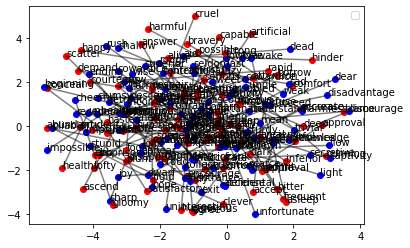

<Figure size 720x720 with 0 Axes>

100


In [21]:
out_2d(anto_list)

C:\Users\14663\.conda\envs\hjf2\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


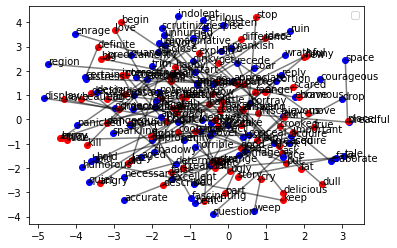

<Figure size 720x720 with 0 Axes>

89


In [22]:
out_2d(syn_list)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


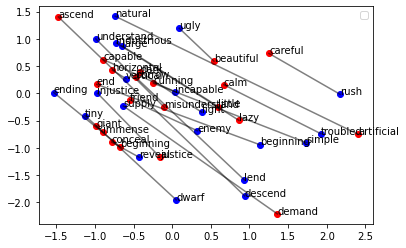

<Figure size 720x720 with 0 Axes>

21


In [23]:
out_2d(anto_list,maxk = -0.5,mink = -1.5,method = "PCA")
#print("love" in glove_model)

C:\Users\14663\.conda\envs\hjf2\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


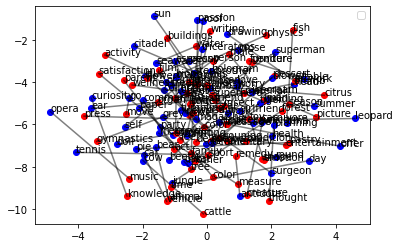

<Figure size 720x720 with 0 Axes>

72


In [59]:
out_2d(hyper_list,maxdis = 5)

C:\Users\14663\.conda\envs\hjf2\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


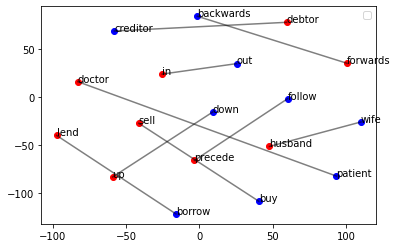

<Figure size 720x720 with 0 Axes>

9


In [57]:
converses = [["lend","borrow"],["precede","follow"],["sell","buy"],["debtor","creditor"],["doctor","patient"],["husband","wife"],["up","down"],["forwards","backwards"],["in","out"]]
out_2d(converses)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


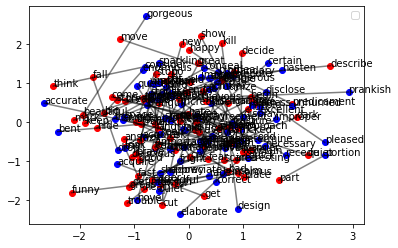

<Figure size 720x720 with 0 Axes>

88


In [24]:
out_2d(syn_list,maxdis = 5,method = "PCA")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


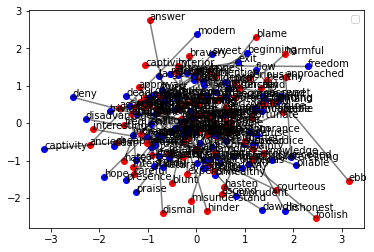

<Figure size 720x720 with 0 Axes>

100


In [25]:
out_2d(anto_list,maxdis = 5,method = "PCA")

C:\Users\14663\.conda\envs\hjf2\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


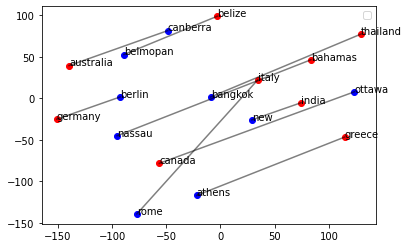

<Figure size 720x720 with 0 Axes>

9


In [55]:
out_2d(contry_list,maxk = 2,mink = 0)

C:\Users\14663\.conda\envs\hjf2\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


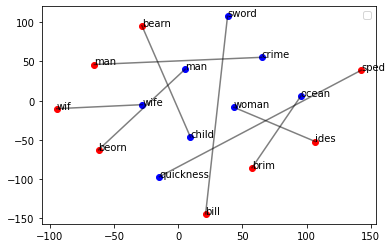

<Figure size 720x720 with 0 Axes>

8


In [27]:
out_2d(old_english_list)

In [28]:
syn_set = set()
anto_set = set()
for words in syn_list:
    for word in words:
        syn_set.add(word)
for words in anto_list:
    for word in words:
        anto_set.add(word)

In [29]:
test_words = []
for word in syn_set:
    if word in anto_set:
        test_words.append(word.lower())
print(test_words)

['new', 'furious', 'behind', 'beautiful', 'begin', 'question', 'rush', 'counterfeit', 'interesting', 'improbable', 'reply', 'happy', 'gloomy', 'inactive', 'grasp', 'conceal', 'hate', 'reveal', 'current', 'answer', 'intelligent', 'disappear', 'lazy', 'calm', 'modern', 'coarse', 'idle', 'fear', 'cease', 'encourage', 'maintain', 'trouble', 'finish', 'brave', 'bright', 'worthy', 'end', 'improper', 'drop', 'advance', 'dark', 'slow', 'little', 'accurate', 'aid', 'immense', 'hasten', 'quiet', 'descend', 'rapid', 'halt', 'correct', 'love', 'ugly']


In [30]:
anto_syn_list = []
for word in test_words:
    tmp = []
    tmp.append(word)
    for words in anto_list:
        if word in words:
            #print(words)
            if word == words[0]:
                tmp.append(words[1])
            else:
                tmp.append(words[0])
            break
    for words in syn_list:
        if word in words:
            #print(words)
            if word == words[0]:
                tmp.append(words[1])
            else:
                tmp.append(words[0])
            break
    anto_syn_list.append(tmp)
print(anto_syn_list)

[['new', 'ancient', 'novel'], ['furious', 'calm', 'angry'], ['behind', 'advance', 'slow'], ['beautiful', 'ugly', 'gorgeous'], ['begin', 'disappear', 'start'], ['question', 'answer', 'ask'], ['rush', 'careful', 'run'], ['counterfeit', 'honest', 'false'], ['interesting', 'uninteresting', 'fascinating'], ['improbable', 'possible', 'amazing'], ['reply', 'demand', 'answer'], ['happy', 'sad', 'pleased'], ['gloomy', 'cheerful', 'dark'], ['inactive', 'strong', 'lazy'], ['grasp', 'misunderstand', 'take'], ['conceal', 'reveal', 'hide'], ['hate', 'love', 'despise'], ['reveal', 'conceal', 'say/tell'], ['current', 'ancient', 'new'], ['answer', 'question', 'reply'], ['intelligent', 'dismal', 'interesting'], ['disappear', 'appear', 'go'], ['lazy', 'industrious', 'indolent'], ['calm', 'troubled', 'quiet'], ['modern', 'ancient', 'new'], ['coarse', 'dainty', 'gross'], ['idle', 'strong', 'lazy'], ['fear', 'bravery', 'fright'], ['cease', 'imprison', 'stop'], ['encourage', 'discourage', 'help'], ['maintain

In [43]:
def out3_2d(my_list,lens = -1,maxk = None,mink = None,use_abs = False,maxdis = None,method = "TSNE"):
#words = ["cat", "dog", "fish", "kitten", "man", "woman","king", "queen", "doctor", "nurse"]
    words = []
    if lens == -1:
        lens = len(my_list)
    for i in range(lens):
        if my_list[i][0] in glove_model and my_list[i][1] in glove_model and my_list[i][2] in glove_model:
            words.append(my_list[i][0])
            words.append(my_list[i][1])
            words.append(my_list[i][2])
    
    tsne = TSNE(n_components=2, learning_rate=100)
    pca = PCA(n_components=2)
    tokens = tokenizer(words, padding=True, truncation=True, return_tensors="pt")
    word_np = bert_model(**tokens).pooler_output.detach().numpy()
    #pca.fit(word_np)
    if method == "PCA":
        word_out = pca.fit_transform(word_np)
    if method == "TSNE":
        word_out = tsne.fit_transform(word_np)

    ax = plt.subplot()
    plt.figure(figsize=(10,10))
    cnt = 0
    for i in range(0,len(words),3):
        k = (word_out[i+1][1]-word_out[i][1])/(word_out[i+1][0]-word_out[i][0])
        if use_abs:
            k = abs(k)
        if maxk!=None and k>maxk:
            continue
        if mink!=None and k<mink:
            continue
        dis = ((word_out[i+1][1]-word_out[i][1])**2+(word_out[i+1][0]-word_out[i][0])**2)**0.5
        if maxdis!=None and dis > maxdis:
            continue
        cnt+=1
        ax.scatter(word_out[i][0],word_out[i][1],color = "red")
        ax.annotate(words[i],xy = (word_out[i][0],word_out[i][1]),xytext = (word_out[i][0],word_out[i][1]))
        ax.scatter(word_out[i+1][0],word_out[i+1][1],color = "blue")
        ax.annotate(words[i+1],xy = (word_out[i+1][0],word_out[i+1][1]),xytext = (word_out[i+1][0],word_out[i+1][1]))
        ax.scatter(word_out[i+2][0],word_out[i+2][1],color = "green")
        ax.annotate(words[i+2],xy = (word_out[i+2][0],word_out[i+2][1]),xytext = (word_out[i+2][0],word_out[i+2][1]))
        ax.plot([word_out[i][0],word_out[i+1][0]],[word_out[i][1],word_out[i+1][1]],color = "red",alpha = 0.5)
        ax.plot([word_out[i+2][0],word_out[i+1][0]],[word_out[i+2][1],word_out[i+1][1]],color = "blue",alpha = 0.5)

    ax.legend()

    plt.show()
    print(cnt)
    # TODO

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


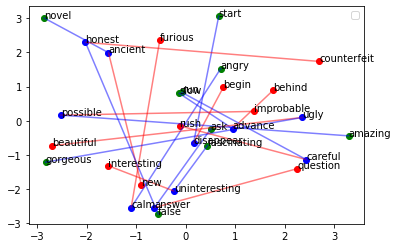

<Figure size 720x720 with 0 Axes>

10


In [44]:
out3_2d(anto_syn_list,10,method = "PCA")

In [45]:
def e_dis(vec1, vec2):
    """
    欧氏距离
    :param vec1:
    :param vec2:
    :return:
    """
    # return np.sqrt(np.sum(np.square(vec1 - vec2)))
    # return sum([(x - y) ** 2 for (x, y) in zip(vec1, vec2)]) ** 0.5
    return np.linalg.norm(vec1 - vec2, ord=2)
def cos_sim(v1: list, v2: list):
    num = float(np.dot(v1, v2))  # 向量点乘
    denom = np.linalg.norm(v1) * np.linalg.norm(v2)  # 求模长的乘积
    return 0.5 + 0.5 * (num / denom) if denom != 0 else 0

In [46]:
anto_syn_dis_tmp = []
for words in anto_syn_list:
    if words[0] not in glove_model or words[1] not in glove_model or words[2] not in glove_model:
        anto_syn_list.remove(words)
        continue
    word_np = np.zeros((len(words),50))
    for i in range(len(words)):
        word_np[i] = glove_model[words[i]]
    print(words)
    e1 = e_dis(word_np[0],word_np[1])
    #e1 = cos_sim(word_np[0],word_np[1])
    e2 = e_dis(word_np[0],word_np[2])
    #e2 = cos_sim(word_np[0],word_np[2])
    print(e1,e2)
    if(e2<6):
        anto_syn_dis_tmp.append([e1,e2])
anto_syn_dis = np.array(anto_syn_dis_tmp)

['new', 'ancient', 'novel']
5.9349466590475695 5.465952460564084
['furious', 'calm', 'angry']
4.226873662368138 2.6413759702204125
['behind', 'advance', 'slow']
4.1838400033962175 4.472782925516969
['beautiful', 'ugly', 'gorgeous']
4.770078931669431 2.3589563537742384
['begin', 'disappear', 'start']
4.136411848501116 2.358835811431782
['question', 'answer', 'ask']
1.7845932320262683 3.236007218866023
['rush', 'careful', 'run']
4.626743905394597 3.773985551717419
['counterfeit', 'honest', 'false']
7.326052111870635 5.008634584592442
['interesting', 'uninteresting', 'fascinating']
4.4442560402039355 2.3876004970273774
['improbable', 'possible', 'amazing']
5.158594925189996 3.8681282666921724
['reply', 'demand', 'answer']
6.240795274224464 3.733407594417845
['happy', 'sad', 'pleased']
3.839949830782534 3.084800788924018
['gloomy', 'cheerful', 'dark']
4.114017316378222 5.458802183417886
['inactive', 'strong', 'lazy']
6.325590476275305 5.778584716392141
['grasp', 'misunderstand', 'take']
4.

In [47]:
print(anto_syn_dis)

[[5.93494666 5.46595246]
 [4.22687366 2.64137597]
 [4.18384    4.47278293]
 [4.77007893 2.35895635]
 [4.13641185 2.35883581]
 [1.78459323 3.23600722]
 [4.62674391 3.77398555]
 [7.32605211 5.00863458]
 [4.44425604 2.3876005 ]
 [5.15859493 3.86812827]
 [6.24079527 3.73340759]
 [3.83994983 3.08480079]
 [4.11401732 5.45880218]
 [6.32559048 5.77858472]
 [4.42591363 4.5667614 ]
 [3.28027918 2.73565182]
 [4.29958388 4.12110424]
 [6.26253648 3.02721057]
 [1.78459323 3.73340759]
 [6.35581498 4.10422603]
 [3.62376238 4.01215115]
 [4.23840888 4.31028726]
 [4.87261615 2.75167578]
 [3.91397567 4.1921548 ]
 [5.28886477 4.7083785 ]
 [6.49841287 5.42786093]
 [6.85736081 4.84228316]
 [2.88914437 3.32900171]
 [5.92013789 4.39697635]
 [3.34463286 4.72749294]
 [4.66419293 5.88292853]
 [3.72564162 2.5450898 ]
 [5.33838658 4.33635657]
 [4.86664483 4.03368874]
 [2.51708848 3.70031146]
 [5.95994186 2.66528651]
 [4.00522097 3.85319043]
 [3.73042529 5.0718231 ]
 [3.37550935 5.21208395]
 [3.68495908 5.72782799]


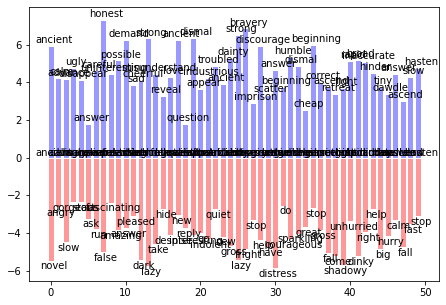

In [48]:
plt.axes([0.025,0.025,0.95,0.95])
anto_dis = anto_syn_dis[:,0]
syn_dis = anto_syn_dis[:,1]
plt.bar(range(len(anto_syn_dis)), +anto_dis, facecolor='#9999ff', edgecolor='white')
plt.bar(range(len(anto_syn_dis)), -syn_dis, facecolor='#ff9999', edgecolor='white')
for i in range(len(anto_syn_dis)):
    plt.text(i+0.4,0,anto_syn_list[i][1] , ha='center', va= 'bottom')
    plt.text(i+0.4, anto_dis[i]+0.05,anto_syn_list[i][1] , ha='center', va= 'bottom')
    plt.text(i+0.4, -syn_dis[i]-0.05, anto_syn_list[i][2], ha='center', va= 'top')
plt.show()

In [49]:
print(anto_dis.mean())
print(syn_dis.mean())

4.5275859394011215
4.014452911358318


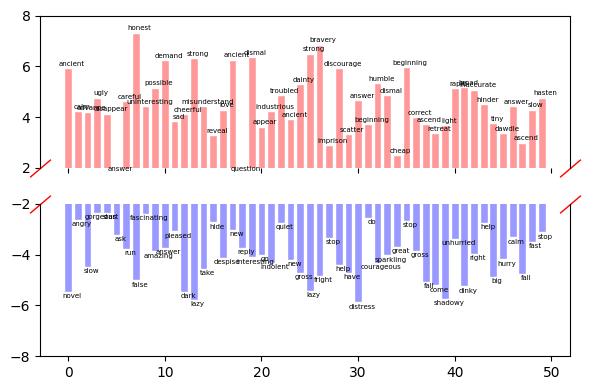

In [50]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, dpi=100)


ax1.bar(range(len(anto_syn_dis)),anto_dis, facecolor='#ff9999', edgecolor='white')
ax2.bar(range(len(anto_syn_dis)),-syn_dis, facecolor='#9999ff', edgecolor='white')

ax1.set_ylim(2, 8)  # 子图1设置y轴范围，只显示部分图
ax2.set_ylim(-8, -2)  # 子图2设置y轴范围，只显示部分图


ax1.spines['bottom'].set_visible(False)#关闭子图1中底部脊
ax2.spines['top'].set_visible(False)##关闭子图2中顶部脊
#ax2.set_xticks(range(0,len(anto_syn_dis),1))


d = .85  #设置倾斜度
#绘制断裂处的标记
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=15,
              linestyle='none', color='r', mec='r', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0],transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
text_size = 5
for i in range(len(anto_syn_dis)):
    #plt.text(i+0.4,-5+(i%10),anto_syn_list[i][1] , ha='center', va= 'bottom',fontsize = text_size )
    ax1.text(i+0.4, anto_dis[i]+0.05,anto_syn_list[i][1] , ha='center', va= 'bottom',fontsize = text_size)
    #ax1.text(i+0.4, anto_dis[i]+1,anto_syn_list[i][0] , ha='center', va= 'bottom',fontsize = text_size)
    ax2.text(i+0.4, -syn_dis[i]-0.05, anto_syn_list[i][2], ha='center', va= 'top',fontsize = text_size)
    #ax2.text(i+0.4, -syn_dis[i]-1, anto_syn_list[i][0], ha='center', va= 'top',fontsize = text_size)

plt.tight_layout()
plt.show()

In [51]:
def out_cluster(my_dict,lens = -1,maxk = None,mink = None,use_abs = False,maxdis = None,method = "TSNE"):
#words = ["cat", "dog", "fish", "kitten", "man", "woman","king", "queen", "doctor", "nurse"]
    colors = ["red","blue","green","purple","orange","yellow"]
    if lens == -1:
        lens = len(my_dict)
    ax = plt.subplot()
    plt.figure(figsize=(10,10))
    cnt = 0
    CNT = 0
    for I in my_dict:
        #print(my_list[i][0],my_list[i][0])
        words = []
        #print(I,my_dict[I])
        for word in my_dict[I]:
            #print(word)
            if word in glove_model:
                words.append(word)
        print(I,words)
        if len(words)<=1:
            continue
        tsne = TSNE(n_components=2, learning_rate=100)
        pca = PCA(n_components=2)
        tokens = tokenizer(words, padding=True, truncation=True, return_tensors="pt")
        word_np = bert_model(**tokens).pooler_output.detach().numpy()
        #pca.fit(word_np)
        if method == "PCA":
            word_out = pca.fit_transform(word_np)
        if method == "TSNE":
            word_out = tsne.fit_transform(word_np)

        ax.scatter(word_out[:,0],word_out[:,1],color = colors[CNT],label = I)
            #ax.annotate(words[i],xy = (word_out[i][0],word_out[i][1]),xytext = (word_out[i][0],word_out[i][1]))
            #ax.scatter(word_out[i+1][0],word_out[i+1][1],color = "blue")
            #ax.annotate(words[i+1],xy = (word_out[i+1][0],word_out[i+1][1]),xytext = (word_out[i+1][0],word_out[i+1][1]))
        CNT+=1

    ax.legend()

    plt.show()
    print(cnt)
    # TODO

fruit ['papaya', 'lemon', 'fig', 'grapes', 'or', 'muskmelon', 'kiwifruit', 'tomato', 'chinese', 'blackberry', 'olives', 'cantaloupe', 'mango', 'mangosteen', 'pawpaw', 'kiwi', 'gooseberry', 'apricot', 'strawberry', 'plum', 'banana', 'apple', 'orange', 'lime', 'green', 'pineapple', 'raisins', 'watermelon', 'olive', 'peach', 'avocado', 'cherry']
vegetable ['mushrooms', 'celery', 'turnip', 'beans', 'string', 'garlic', 'eggplant', 'or', 'peas', 'pumpkin', 'beetroot', 'onion', 'yam', 'potato', 'cucumber', 'cauliflower', 'lettuce', 'brussels', 'cabbage', 'sprouts', 'bell', 'spinach', 'pepper', 'carrot', 'capsicum', 'green', 'zucchini', 'broccoli', 'asparagus', 'artichoke']
sports ['gymnastics', 'skating', 'rugby', 'popular', 'basketball', 'athletics', 'sports', 'boxing', 'ice', 'baseball', 'tennis', 'cricket', 'figure', 'swimming', 'skiing', 'squash', 'other', 'golf', 'vocabulary', 'football', 'hockey', 'badminton']
music ['hop', 'jazz', 'rock', 'dance', 'music', 'soul', 'country', 'hip', 'an

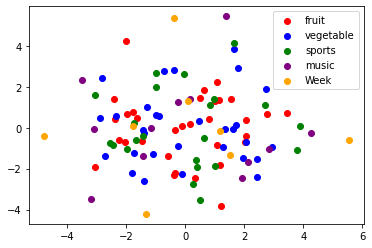

<Figure size 720x720 with 0 Axes>

0


In [52]:
#print(topic_dict)
out_cluster(topic_dict,method = "PCA")

fruit ['papaya', 'lemon', 'fig', 'grapes', 'or', 'muskmelon', 'kiwifruit', 'tomato', 'chinese', 'blackberry', 'olives', 'cantaloupe', 'mango', 'mangosteen', 'pawpaw', 'kiwi', 'gooseberry', 'apricot', 'strawberry', 'plum', 'banana', 'apple', 'orange', 'lime', 'green', 'pineapple', 'raisins', 'watermelon', 'olive', 'peach', 'avocado', 'cherry']


C:\Users\14663\.conda\envs\hjf2\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


vegetable ['mushrooms', 'celery', 'turnip', 'beans', 'string', 'garlic', 'eggplant', 'or', 'peas', 'pumpkin', 'beetroot', 'onion', 'yam', 'potato', 'cucumber', 'cauliflower', 'lettuce', 'brussels', 'cabbage', 'sprouts', 'bell', 'spinach', 'pepper', 'carrot', 'capsicum', 'green', 'zucchini', 'broccoli', 'asparagus', 'artichoke']


C:\Users\14663\.conda\envs\hjf2\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


sports ['gymnastics', 'skating', 'rugby', 'popular', 'basketball', 'athletics', 'sports', 'boxing', 'ice', 'baseball', 'tennis', 'cricket', 'figure', 'swimming', 'skiing', 'squash', 'other', 'golf', 'vocabulary', 'football', 'hockey', 'badminton']


C:\Users\14663\.conda\envs\hjf2\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


music ['hop', 'jazz', 'rock', 'dance', 'music', 'soul', 'country', 'hip', 'and', 'rhythm', 'roll', 'blues']


C:\Users\14663\.conda\envs\hjf2\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


Week ['sunday', 'wednesday', 'thursday', 'tuesday', 'friday', 'saturday', 'weekend', 'monday']


C:\Users\14663\.conda\envs\hjf2\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


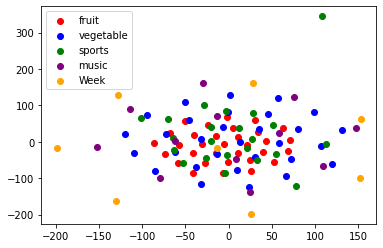

<Figure size 720x720 with 0 Axes>

0


In [53]:
out_cluster(topic_dict,method = "TSNE")

a ['solar', 'polite', 'penitent', 'rural', 'abundant', 'considerate', 'asleep', 'apparent', 'manifest', 'private', 'upward', 'despondent', 'flexible', 'cosmic', 'extraordinary', 'pressing', 'nutritious', 'globular', 'impure', 'mobile', 'elementary', 'opponent', 'ultramodern', 'epidemic', 'zealous', 'spectacular', 'illogical', '=', 'precise', 'precious', 'minor', 'bookish', 'similar', 'symmetrical', 'abnormal', 'sinuous', 'facetious', 'grave', 'cordial', 'illegal', 'artful', 'elephantine', 'sane', 'untutored', 'rustic', 'benevolent', 'alien', 'finite', 'arbitrary', 'acute', 'insistent', 'bilingual', 'concentric', 'jocular', 'illiterate', 'splendid', 'moderate', 'romantic', 'capacious', 'problematic', 'agnostic', 'horrible', 'sensible', 'special', 'infinite', 'stellar', 'vagrant', 'cryptic', 'external', 'major', 'eminent', 'homogeneous', 'notable', 'radical', 'sociable', 'ridiculous', 'ponderous', 'senior', 'medieval', 'subcentral', 'exceptionally', 'numerous', 'contagious', 'familiar', 

C:\Users\14663\.conda\envs\hjf2\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


v ['proliferate', 'contest', 'invade', 'promote', 'ascend', 'erect', 'deny', 'befall', 'adjust', 'accustom', 'denigrate', 'upset', 'constrain', 'appraise', 'polish', 'dislike', 'touch', 'languish', 'dilute', 'obtain', 'elicit', 'denounce', 'incite', 'request', 'vanish', 'declaim', 'inhibit', 'unveil', 'select', 'compose', 'rotate', 'lavish', 'bisect', 'approach', 'concur', 'confuse', 'germinate', 'curtail', 'adhere', 'surge', 'encumber', 'announce', 'interrupt', 'approve', 'divert', 'coordinate', 'embitter', 'expel', 'relax', 'comprise', 'deserve', 'deplore', 'relinquish', 'constitute', 'divest', 'erase', 'suffer', 'elapse', 'inspire', 'uproot', 'behave', 'attach', 'reset', 'devour', 'refuse', 'arrogate', 'retire', 'affirm', 'complicate', 'anticipate', 'accompany', 'distribute', 'unite', 'admonish', 'respond', 'ventilate', 'insure', 'congest', 'diffuse', 'contradict', 'procreate', 'confront', 'pose', 'depart', 'idolize', 'outflow', 'beautify', 'confirm', 'insert', 'disturb', 'unlock', 

C:\Users\14663\.conda\envs\hjf2\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


n ['detour', 'joint', 'sympathy', 'magnificence', 'egoism', 'miracle', 'vacancy', 'chieftain', 'virtuoso', 'cooperation', 'nursery', 'licence', 'anatomy', 'imagination', 'equality', 'agenda', 'minority', 'negro', 'operation', 'helix', 'tropic', 'banking', 'definition', 'telegraph', 'accent', 'overturn', 'mansion', 'cosmos', 'mattress', 'destruction', 'campaign', 'barrage', 'altitude', 'vice-president', 'albinism', 'carnage', 'morphology', 'rejuvenation', 'choir', 'mountain', 'minibus', 'pentagram', 'nationalist', 'via', 'attitude', 'dentist', 'historian', 'detoxify', 'petition', 'atheism', 'verify', 'legislature', 'benefit', 'brutalism', 'oblivion', 'cognition', 'vigor', 'ignorance', 'arbiter', 'captive', 'telephone', 'heading', 'innovation', 'captain', 'urine', 'grief', 'journalist', 'vision', 'crusade', 'quasi-war', 'solitude', 'vocabulary', 'excitation', 'bible', 'gratitude', 'missionary', 'amplitude', 'agency', 'corpse', 'curiosity', 'modernism', 'efficiency', 'anarchism', 'freedom

C:\Users\14663\.conda\envs\hjf2\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


prep ['below', 'of', 'around', 'towards', 'via', 'until', 'excluding', 'inside', 'from', 'concerning', 'toward', 'over', 'amid', 'among', 'without', 'past', 'near', 'under', 'at', 'aboard', 'between', 'upon', 'outside', 'as', 'like', 'within', 'but', 'by', 'for', 'down', 'during', 'per', 'with', 'beyond', 'excepting', 'onto', 'regarding', 'to', 'against', 'minus', 'before', 'save', 'about', 'along', 'underneath', 'anti', 'after', 'versus', 'off', 'beside', 'opposite', 'across', 'considering', 'on', 'than', 'in', 'up', 'into', 'behind', 'round', 'since', 'above', 'except', 'beneath', 'despite', 'plus', 'besides', 'following', 'unlike', 'through']


C:\Users\14663\.conda\envs\hjf2\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


adv ['accidentally', 'fairly', 'bitterly', 'politely', 'especially', 'miserably', 'happily', 'slowly', 'carefully', 'zealously', 'immediately', 'mysteriously', 'doubtfully', 'easily', 'suddenly', 'jealously', 'unfortunately', 'keenly', 'briefly', 'often', 'certainly', 'generally', 'bravely', 'exactly', 'helpfully', 'rapidly', 'wrongly', 'unexpectedly', 'usefully', 'arrogantly', 'lively', 'seldom', 'quickly', 'yesterday', 'voluntarily', 'always', 'daily', 'beautifully', 'actually', 'naturally', 'regularly', 'officially', 'annually', 'randomly', 'greatly', 'awkwardly', 'anxiously', 'honestly', 'thankfully']


C:\Users\14663\.conda\envs\hjf2\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


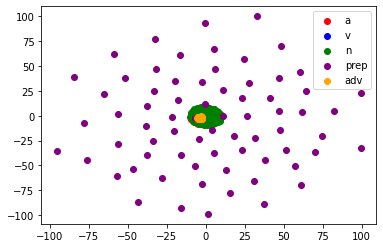

<Figure size 720x720 with 0 Axes>

0


In [54]:
out_cluster(chara_dict,method = "TSNE")